<a href="https://colab.research.google.com/github/hemanshu16/ML_Labs-CE038-/blob/main/Copy_of_ML_Lab_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys, os
from matplotlib.pyplot import *
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np


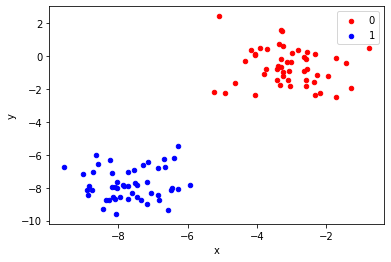

In [ ]:
# importing scikit learn with make_blobs
# creating datasets X containing n_samples
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()
# Y containing two classes

# plotting scatters



In [ ]:
# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(y_test)

[1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0]


In [ ]:
# Create a linear SVM classifier
clf = svm.SVC(kernel='linear',C=100)
clf.fit(X_train,y_train)

SVC(C=100, kernel='linear')

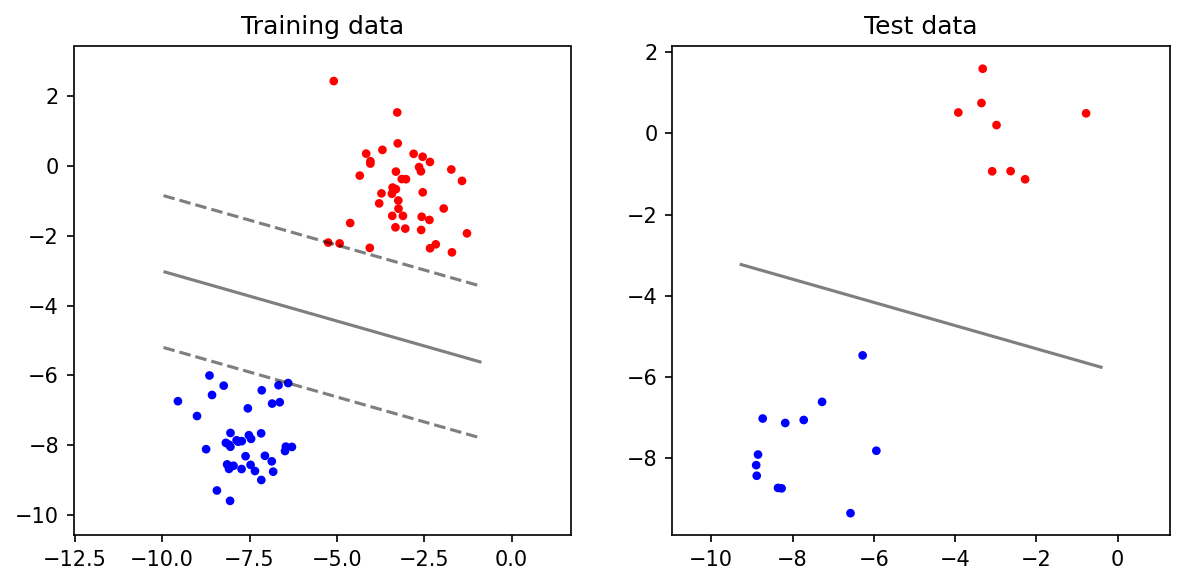

In [ ]:

## Plot decision function on training and test data
data_colors = [(1, 0, 0), (0, 0, 1)]


def get_colors(y):
  return [data_colors[item] for item in y]

def plot_decision_function(X_train, y_train, X_test, y_test, clf):
  plt.figure(figsize=(8, 4), dpi=150)
  plt.subplot(121)
  plt.title("Training data")
  plot_decision_function_helper(X_train, y_train, clf)
  plt.subplot(122)
  plt.title("Test data")
  plot_decision_function_helper(X_test, y_test, clf, True)
  plt.show()


def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):
  
  colors = get_colors(y)
  plt.axis('equal')
  plt.tight_layout()
  #plt.axis('off')

  plt.scatter(X[:, 0], X[:, 1], c = colors, s = 10, edgecolors=colors)
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # Create grid to evaluate model
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = clf.decision_function(xy).reshape(XX.shape)

  
  if  show_only_decision_function:
    # Plot decision boundary
    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
             linestyles=['-'])
  else :
    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
             linestyles=['--', '-', '--'])
    # Plot support vectors
    #ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 10,
    #         linewidth=1, facecolors='k', c = 'k', label='Support Vectors')
 
    #plt.legend(fontsize='small')
  

plot_decision_function(X_train, y_train, X_test, y_test,clf)

In [ ]:
# Make predictions on unseen test data
clf_predictions = clf.predict(X_test)
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100 ))

Accuracy: 100.0%


You may be tempted to ask which value of C is better. The answer depends on how much noise you think there is in your data. If you think the data is very noisy, you want C to be small. On the other hand, if you think the data is less noisy, you should choose C to be large.

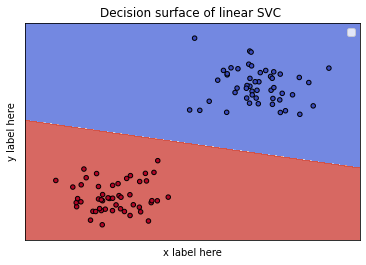

In [ ]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20,edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,clf_predictions))
print(classification_report(y_test,clf_predictions))

[[ 8  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Part B : Breast Cancer Prediction Example

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
#Load dataset
cancer = datasets.load_breast_cancer()
data = cancer

In [ ]:
# print the names of the 13 features
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']
# print the label type of cancer('malignant' 'benign')
print(label_names)
print(features)
print(feature_names)


['malignant' 'benign']
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
 print(features.shape)
 print(labels.shape)

(569, 30)
(569,)


In [ ]:
# plotting scatters

In [ ]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear')

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=0)

#Train the model using the training sets
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
 # Model Precision: what percentage of positive tuples are abeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.956140350877193
Precision: 0.984375
Recall: 0.9402985074626866
